# Statistical Analysis on Subopt Explanatory Power

As we saw from the previous notebook, just looking at the correlation between mfold_opt energy and viennafold_opt energy gave us a correlation of .775 or an r^2 of .601. This notebook looks at the suboptimal values to see if they can add more explanatory power to help us understand the differences between the implementations of the two programs.

Implementation: I was able to pull all the subopt structres within a certain energy level for both mfold and viennaFold. Vienna had substantially more structures (aroudn 1000x more than mfold for each sequence). Then I created a csv/df of all the attributes such as mean/stdev/min for easier analysis.

Results: It appears that we do not gain a signifcant boost in explanatory power since the important distribution variables are extremely correlated with each other (~.98). Using the mean of the top 100
results in vienna_fold gave a slight boost of an r^2 of .62

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import skew
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
subopts = {}
with open('subopt_values.pkl', 'rb') as handle:
    subopts = pkl.load(handle)

## Here is an example of data from Vienna vs MFOLD

In [3]:
example_sequence = list(subopts.keys())[0]
print(example_sequence)

GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUGGAGAGGUUAUCCUCUCACCGAGAUCGGAAGAGCACACGUCUGAACUCCA


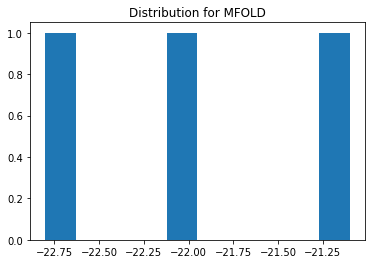

This sequence has 3 foldings according to mfold


In [4]:
# we only have 3 data points for this sequence in mfold
plt.hist(subopts[example_sequence]['MFOLD'])
plt.title("Distribution for MFOLD")
plt.show()
print("This sequence has {} foldings according to mfold".format(len(subopts[example_sequence]['MFOLD'])))

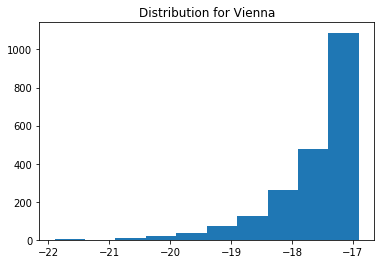

This sequence has 2097 foldings according to viennafold


In [5]:
# we only have 3 data points for this sequence in mfold
plt.hist(subopts[example_sequence]['VIENNA'])
plt.title("Distribution for Vienna")
plt.show()
print("This sequence has {} foldings according to viennafold".format(len(subopts[example_sequence]['VIENNA'])))

## Now I will make a csv of all the major characteristics of each distribution and see if we can achieve an r correlation better than opt v opt 

In [9]:
#df = pd.DataFrame(columns=['mfold_opt','mfold_worst','mfold_mean','mfold_samples','mfold_std',
#                           'mfold_skew','mfold_median', 'vienna_opt', 'vienna_worst', 'vienna_mean' 'vienna_samples',
#                           'vienna_std, vienna_skew'])
data = []
for key in subopts:
    mfold_dist = subopts[key]['MFOLD']
    vienna_dist = subopts[key]['VIENNA']
    
    mfold_opt = min(mfold_dist)
    mfold_worst = max(mfold_dist)
    mfold_mean = np.mean(mfold_dist)
    mfold_samples = len(mfold_dist)
    mfold_std = np.std(mfold_dist)
    mfold_skew = skew(mfold_dist)
    mfold_median = np.median(mfold_dist)
    
    vienna_opt = min(vienna_dist)
    vienna_worst = max(vienna_dist)
    vienna_mean = np.mean(vienna_dist)
    vienna_samples = len(vienna_dist)
    vienna_std = np.std(vienna_dist)
    vienna_skew = skew(vienna_dist)
    vienna_median = np.median(vienna_dist)
    vienna_dist_100 = sorted(vienna_dist)[:100]
    #print(vienna_dist)
    #print(sorted(vienna_dist))
    #print(vienna_dist_100)
    #break
    vienna_worst_100 = max(vienna_dist_100)
    vienna_mean_100 = np.mean(vienna_dist_100)
    
    data.append([mfold_opt, mfold_worst, mfold_mean, mfold_samples, mfold_std, mfold_skew, mfold_median,
              vienna_opt, vienna_worst, vienna_mean, vienna_samples, vienna_std, vienna_skew,
                 vienna_median, vienna_worst_100, vienna_mean_100])
df = pd.DataFrame(data, columns=['mfold_opt','mfold_worst','mfold_mean','mfold_samples','mfold_std',
                           'mfold_skew','mfold_median', 'vienna_opt', 'vienna_worst', 'vienna_mean',
                           'vienna_samples', 'vienna_std', 'vienna_skew', 'vienna_median',
                            'vienna_worst_100', 'vienna_mean_100'])
df['Sequence'] = list(subopts.keys())

In [7]:
#example of the sample results
df.head()

,mfold_opt,mfold_worst,mfold_mean,mfold_samples,mfold_std,mfold_skew,mfold_median,vienna_opt,vienna_worst,vienna_mean,vienna_samples,vienna_std,vienna_skew,vienna_median,vienna_worst_100,vienna_mean_100
0,-22.80,-21.10,-22.00,3,0.697615,0.212073,-22.10,-21.9,-16.9,-17.643825,2097,0.751334,-1.611854,-17.4,-19.200001,-19.856
1,-21.47,-21.47,-21.47,1,0.000000,0.000000,-21.47,-23.9,-18.9,-19.735792,1288,0.838893,-1.601279,-19.5,-21.100000,-21.820
2,-15.80,-15.20,-15.50,2,0.300000,0.000000,-15.50,-15.5,-10.5,-11.225309,10127,0.724902,-1.580592,-11.0,-13.700000,-14.197
3,-17.67,-17.67,-17.67,1,0.000000,0.000000,-17.67,-19.5,-14.5,-15.347548,4894,0.831892,-1.490905,-15.1,-17.700001,-18.254
4,-15.99,-15.99,-15.99,1,0.000000,0.000000,-15.99,-15.7,-10.7,-11.386458,4630,0.699062,-1.641765,-11.2,-13.400000,-13.914


In [33]:
#just comparing the opts for both columns
X = df[['vienna_opt']]
y = df[['mfold_opt']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mfold_opt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     7427.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:57:20   Log-Likelihood:                -8798.4
No. Observations:                4936   AIC:                         1.760e+04
Df Residuals:                    4934   BIC:                         1.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9821      0.182    -16.369      0.0

In [63]:
#This is the correlation r^2 for the most correlated feature (vienna_worst_100)
X = df[['vienna_opt', 'vienna_worst_100']]
y = df[['mfold_opt']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mfold_opt   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3994.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:19:20   Log-Likelihood:                -8688.5
No. Observations:                4936   AIC:                         1.738e+04
Df Residuals:                    4933   BIC:                         1.740e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.0151      0.178  

In [64]:
#As you can see, adding the rest of these features give a marginal improvement on explanatory power
X = df[['vienna_opt', 'vienna_worst', 'vienna_mean',
                           'vienna_samples', 'vienna_std', 'vienna_skew', 'vienna_median',
                            'vienna_worst_100', 'vienna_mean_100']]
y = df[['mfold_opt']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mfold_opt   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     917.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:19:58   Log-Likelihood:                -8635.5
No. Observations:                4936   AIC:                         1.729e+04
Df Residuals:                    4926   BIC:                         1.736e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.458e+05   1.86e+05  

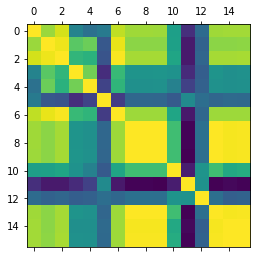

In [55]:
#as you can see from the correlation heat map, everything vienna that has a decent (light green correlation
#with anything of mfold already has an extremely high correlation with every other thing so not
#much explanatory power is gained by adding more of these correlated features)
plt.matshow(df.corr())
plt.show()

In [56]:
df.corr()

,mfold_opt,mfold_worst,mfold_mean,mfold_samples,mfold_std,mfold_skew,mfold_median,vienna_opt,vienna_worst,vienna_mean,vienna_samples,vienna_std,vienna_skew,vienna_median,vienna_worst_100,vienna_mean_100
mfold_opt,1.000000,0.763675,0.896358,0.137928,0.021444,0.073278,0.853456,0.775137,0.775137,0.773613,0.320235,-0.351870,-0.017314,0.774623,0.785249,0.785037
mfold_worst,0.763675,1.000000,0.961244,0.599718,0.646409,-0.129765,0.945199,0.727819,0.727819,0.729012,0.326557,-0.447751,-0.070540,0.729041,0.729393,0.732174
mfold_mean,0.896358,0.961244,1.000000,0.467622,0.434334,-0.159217,0.986802,0.789588,0.789588,0.790012,0.354017,-0.448925,-0.048604,0.790273,0.792257,0.794600
mfold_samples,0.137928,0.599718,0.467622,1.000000,0.667518,-0.359928,0.490315,0.245174,0.245174,0.250461,0.230696,-0.372716,-0.094740,0.248536,0.218353,0.226727
mfold_std,0.021444,0.646409,0.434334,0.667518,1.000000,-0.247805,0.460712,0.223941,0.223941,0.226982,0.120917,-0.258349,-0.077496,0.226091,0.217186,0.221038
mfold_skew,0.073278,-0.129765,-0.159217,-0.359928,-0.247805,1.000000,-0.285470,-0.042622,-0.042622,-0.045952,-0.118419,0.187556,0.001060,-0.044299,-0.021067,-0.027203
mfold_median,0.853456,0.945199,0.986802,0.490315,0.460712,-0.285470,1.000000,0.768483,0.768483,0.769329,0.355332,-0.459234,-0.042969,0.769338,0.768397,0.771499
vienna_opt,0.775137,0.727819,0.789588,0.245174,0.223941,-0.042622,0.768483,1.000000,1.000000,0.999812,0.519742,-0.547525,0.016168,0.999840,0.975987,0.982456
vienna_worst,0.775137,0.727819,0.789588,0.245174,0.223941,-0.042622,0.768483,1.000000,1.000000,0.999812,0.519742,-0.547525,0.016168,0.999840,0.975987,0.982456
vienna_mean,0.773613,0.729012,0.790012,0.250461,0.226982,-0.045952,0.769329,0.999812,0.999812,1.000000,0.522003,-0.563041,0.006960,0.999887,0.976087,0.982825


In [11]:
# save the attributes
df.to_csv("subopt_attributes.csv", index=False)

In [12]:
df.head()

,mfold_opt,mfold_worst,mfold_mean,mfold_samples,mfold_std,mfold_skew,mfold_median,vienna_opt,vienna_worst,vienna_mean,vienna_samples,vienna_std,vienna_skew,vienna_median,vienna_worst_100,vienna_mean_100,Sequence
0,-22.80,-21.10,-22.00,3,0.697615,0.212073,-22.10,-21.9,-16.9,-17.643825,2097,0.751334,-1.611854,-17.4,-19.200001,-19.856,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUGGAGAGGUUAUCC...
1,-21.47,-21.47,-21.47,1,0.000000,0.000000,-21.47,-23.9,-18.9,-19.735792,1288,0.838893,-1.601279,-19.5,-21.100000,-21.820,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGAUCCGC...
2,-15.80,-15.20,-15.50,2,0.300000,0.000000,-15.50,-15.5,-10.5,-11.225309,10127,0.724902,-1.580592,-11.0,-13.700000,-14.197,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAGAGGUUAUCC...
3,-17.67,-17.67,-17.67,1,0.000000,0.000000,-17.67,-19.5,-14.5,-15.347548,4894,0.831892,-1.490905,-15.1,-17.700001,-18.254,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUAGAUGAGGUUAUC...
4,-15.99,-15.99,-15.99,1,0.000000,0.000000,-15.99,-15.7,-10.7,-11.386458,4630,0.699062,-1.641765,-11.2,-13.400000,-13.914,GGGAAUGGAUCCACAUCUACGAAUUCGUACCAUACUCUCCAAUAGG...


# Now this is just using vienna

In [9]:
import pickle as pkl
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import skew
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
subopts = {}
with open('subopt_values7.pkl', 'rb') as handle:
    subopts = pkl.load(handle)

In [11]:
example_sequence = list(subopts.keys())[0]
print(example_sequence)

GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAAUAUUCAUGGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA


In [12]:
#df = pd.DataFrame(columns=['mfold_opt','mfold_worst','mfold_mean','mfold_samples','mfold_std',
#                           'mfold_skew','mfold_median', 'vienna_opt', 'vienna_worst', 'vienna_mean' 'vienna_samples',
#                           'vienna_std, vienna_skew'])
data = []
for key in subopts:
    vienna_dist = subopts[key]['VIENNA']

    vienna_opt = min(vienna_dist)
    vienna_worst = max(vienna_dist)
    vienna_mean = np.mean(vienna_dist)
    vienna_samples = len(vienna_dist)
    vienna_std = np.std(vienna_dist)
    vienna_skew = skew(vienna_dist)
    vienna_median = np.median(vienna_dist)
    vienna_dist_100 = sorted(vienna_dist)[:100]
    #print(vienna_dist)
    #print(sorted(vienna_dist))
    #print(vienna_dist_100)
    #break
    vienna_worst_100 = max(vienna_dist_100)
    vienna_mean_100 = np.mean(vienna_dist_100)
    
    data.append([vienna_opt, vienna_worst, vienna_mean, vienna_samples, vienna_std, vienna_skew,
                 vienna_median, vienna_worst_100, vienna_mean_100])
df = pd.DataFrame(data, columns=['vienna_opt', 'vienna_worst', 'vienna_mean',
                           'vienna_samples', 'vienna_std', 'vienna_skew', 'vienna_median',
                            'vienna_worst_100', 'vienna_mean_100'])
df['Sequence'] = list(subopts.keys())

In [13]:
df.head()

,vienna_opt,vienna_worst,vienna_mean,vienna_samples,vienna_std,vienna_skew,vienna_median,vienna_worst_100,vienna_mean_100,Sequence
0,-14.100000,-9.1,-9.720285,45779,0.624735,-1.615568,-9.5,-12.6,-12.941,GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAAUAUUC...
1,-18.200001,-13.2,-13.840201,3927,0.651043,-1.708934,-13.6,-15.6,-16.141,GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAACAUUC...
2,-13.700000,-8.7,-9.372782,8847,0.674820,-1.615505,-9.2,-11.6,-12.112,GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUGACUUUAUAAG...
3,-14.100000,-9.1,-9.736685,17244,0.647664,-1.631852,-9.5,-12.4,-12.717,GGGAAUGGAUCCACAUCUACGAAUUCGUUUAUUGAUCUUGAAAUAU...
4,-14.400000,-9.4,-10.083441,9445,0.687466,-1.615252,-9.9,-12.4,-12.912,GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCAUGAAAUAUU...


In [14]:
subopts.keys()

dict_keys(['GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAAUAUUCAUGGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAACAUUCCGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUGACUUUAUAAGUCCUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUAUUGAUCUUGAAAUAUUCAGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCAUGAAAUAUUCACGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAAUAUUCAGUAGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUCUGAUCUGAAAUAUUCAUGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUUUGAUCUGAAGCAUAUUCAGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUCUGAUCUGAAAUAUUCCGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUUCUUGAUCUGAAAUAUUACAGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUCUACGAAUUCGUUGCUGAUCUGAAAUAUUCAGGUCUGCAGAUCGGAAGAGCACACGUCUGAACUCCA', 'GGGAAUGGAUCCACAUC

In [15]:
# save the attributes
df.to_csv("subopt_attributes7.csv", index=False)